In [1]:
# from google.colab import drive
# drive.mount('/content/drive/',force_remount=True)

In [1]:
LEARNING = 1e-5

In [2]:
from __future__ import print_function

import os
#import os
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
keras.__version__
#VERSAO KERAS '2.1.2'

# plt.imshow(y_val[2],cmap='gray')

# from skimage.transform import resize
# from skimage.io import imsave
import traceback
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model,Sequential,load_model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D,AveragePooling2D, Conv2DTranspose,Layer,Cropping2D
from keras.layers import Dense,Flatten, Dropout,BatchNormalization, ZeroPadding2D,Lambda
from keras.optimizers import Adam,SGD
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,Callback
from keras.layers.core import Activation,Reshape
from keras import backend as K
from keras.engine import Layer as LayerEngine, InputSpec
from keras.utils.generic_utils import Progbar
#from keras.utils.training_utils import multi_gpu_model

K.set_image_data_format('channels_last')  # TF dimension ordering in this code

import tensorflow as tf
import argparse
from keras.utils import to_categorical
import json,glob #, cv2
from datetime import datetime
import logging
log=logging.getLogger()
log.setLevel(10)

K.set_image_data_format('channels_last')  # TF dimension ordering in this code

smooth = 1.


# Imports
#from glob import glob
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from skimage.io import imread, imread_collection, imsave
#from scipy.misc import imsave as save
from skimage.filters import median,threshold_otsu
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
#from sklearn.cluster import KMeans
from skimage import util 
from skimage.segmentation import clear_border
from skimage.morphology import label, closing, square, erosion, dilation
from skimage.measure import regionprops
from skimage.color import lab2rgb
from functools import reduce
import math as m

from sklearn.model_selection import KFold
import time

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# PH2

In [4]:
# pegar as imagens convertidas 128 x 128
# imagens = imread_collection('/content/drive/My Drive/Colab Notebooks/bases_de_imagens/PH2Dataset/imagens_resize_128/*')
# mascaras_medico = imread_collection('/content/drive/My Drive/Colab Notebooks/bases_de_imagens/PH2Dataset/mascaras_resize_128/*')

# pegar as imagens convertidas 128 x 128
# imagens = imread_collection('/content/drive/My Drive/Colab Notebooks/bases_de_imagens/PH2Dataset/PH2PROPORCIONAL128/imagens/*')
# mascaras_medico = imread_collection('/content/drive/My Drive/Colab Notebooks/bases_de_imagens/PH2Dataset/PH2PROPORCIONAL128/mascaras/*')

# # pegar as imagens convertidas 256 x 256
# imagens = imread_collection('/content/drive/My Drive/Colab Notebooks/bases_de_imagens/PH2Dataset/PH2PROPORCIONAL256/imagens/*')
# mascaras_medico = imread_collection('/content/drive/My Drive/Colab Notebooks/bases_de_imagens/PH2Dataset/PH2PROPORCIONAL256/mascaras/*')

# DermIS

In [ ]:
# # pegar as imagens convertidas 128 x 128
# melanoma_imagens = imread_collection('/content/drive/My Drive/Colab Notebooks/DERMIS/DERMIS128/melanoma/*orig*')
# melanoma_mascaras_medico = imread_collection('/content/drive/My Drive/Colab Notebooks/DERMIS/DERMIS128/melanoma/*contour*')

# # pegar as imagens convertidas 128 x 128
# notmelanoma_imagens = imread_collection('/content/drive/My Drive/Colab Notebooks/DERMIS/DERMIS128/notmelanoma/*orig*')
# notmelanoma_mascaras_medico = imread_collection('/content/drive/My Drive/Colab Notebooks/DERMIS/DERMIS128/notmelanoma/*contour*')

# # pegar as imagens convertidas 256 x 256
# melanoma_imagens = imread_collection('/content/drive/My Drive/Colab Notebooks/DERMIS/DERMIS256/melanoma/*orig*')
# melanoma_mascaras_medico = imread_collection('/content/drive/My Drive/Colab Notebooks/DERMIS/DERMIS256/melanoma/*contour*')

# # pegar as imagens convertidas 256 x 256
# notmelanoma_imagens = imread_collection('/content/drive/My Drive/Colab Notebooks/DERMIS/DERMIS256/notmelanoma/*orig*')
# notmelanoma_mascaras_medico = imread_collection('/content/drive/My Drive/Colab Notebooks/DERMIS/DERMIS256/notmelanoma/*contour*')

# imagens = np.concatenate((melanoma_imagens, notmelanoma_imagens), axis=0)
# mascaras_medico = np.concatenate((melanoma_mascaras_medico, notmelanoma_mascaras_medico), axis=0)

# ISIC 2018

In [4]:
# pegar as imagens convertidas 128 x 128
melanoma_imagens = imread_collection('/home/rafael/Documentos/mestrado/ISIC2018/ISIC2018-128/MELANOMA/*')
melanoma_mascaras_medico = imread_collection('/home/rafael/Documentos/mestrado/ISIC2018/ISIC2018-128/MASKMELANOMA/*')

# pegar as imagens convertidas 128 x 128
notmelanoma_imagens = imread_collection('/home/rafael/Documentos/mestrado/ISIC2018/ISIC2018-128/NMELANOMA/*')
notmelanoma_mascaras_medico = imread_collection('/home/rafael/Documentos/mestrado/ISIC2018/ISIC2018-128/MASKNMELANOMA/*')

imagens = np.concatenate((melanoma_imagens, notmelanoma_imagens), axis=0)
mascaras_medico = np.concatenate((melanoma_mascaras_medico, notmelanoma_mascaras_medico), axis=0)

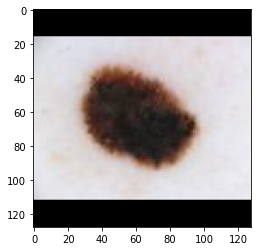

In [5]:
plt.imshow(imagens[1])

In [9]:
# plt.imshow(mascaras_medico[1])

# Para colocar em cinza

In [ ]:
# def rgb2grayrafatodas(imagens):
#     linhas, colunas = imagens[0].shape[:2]
#     imagens_cinza = np.zeros((len(imagens),linhas,colunas))
#     for i,imagem in enumerate(imagens):
#         imagens_cinza[i,:,:] = rgb2gray(imagem)

#     return imagens_cinza

# def pre_processamento(imagens):
#     linhas, colunas = imagens[0].shape[:2]
#     imagens_cinza = np.zeros((len(imagens),linhas,colunas))
#     for i,imagem in enumerate(imagens):
        
#         cinza = rgb2gray(imagem)
#         #borrar
#         selem = disk(20)
#         img_med = median(cinza,selem)

#         #Equalizar
#         img_adapteq = equalize_adapthist(img_med, clip_limit=0.009)
        
#         imagens_cinza[i,:,:] = img_adapteq

#     return imagens_cinza

In [ ]:
# imagens = rgb2grayrafatodas(imagens)
# imagens = pre_processamento(imagens)

In [ ]:
# x_train, x_val, y_train, y_val = train_test_split(imagens, mascaras_medico, test_size = 0.4, random_state = 11)
# x_test, x_val, y_test, y_val = train_test_split(x_val, y_val, test_size = 0.5, random_state = 12)


# x_train= np.asarray(x_train)
# y_train= (np.asarray(y_train)> threshold_otsu(np.asarray(y_train)))
# x_val= np.asarray(x_val)
# y_val= (np.asarray(y_val)>threshold_otsu(np.asarray(y_val)))
# x_test= np.asarray(x_test)
# y_test= (np.asarray(y_test)>threshold_otsu(np.asarray(y_test)))

In [ ]:
# x_train = x_train.reshape(-1, 128, 128, 1).astype('float32') / 255.
# x_test = x_test.reshape(-1, 128, 128, 1).astype('float32') / 255.
# x_val= x_val.reshape(-1, 128, 128, 1).astype('float32') / 255.

In [6]:
def get_model_memory_usage(batch_size, model):
    shapes_mem_count = 0
    for l in model.layers:
        single_layer_mem = 1
        for s in l.output_shape:
            if s is None:
                continue
            single_layer_mem *= s
        shapes_mem_count += single_layer_mem

    trainable_count = np.sum([K.count_params(p) for p in set(model.trainable_weights)])
    non_trainable_count = np.sum([K.count_params(p) for p in set(model.non_trainable_weights)])

    total_memory = 4.0*batch_size*(shapes_mem_count + trainable_count + non_trainable_count)
    gbytes = np.round(total_memory / (1024.0 ** 3), 3)
    return gbytes

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

def dice_jonnison(y_true, y_pred, smooth=1):
    # y_true = K.cast(y_true,'bool')
    # y_pred = K.cast(y_pred,'bool')
    # y_pred = K.cast(y_pred,'float32')
    # y_true = K.cast(y_true,'float32')
    im_sum = K.sum(y_pred) + K.sum(y_true)
    intersection = y_true * y_pred
    return 2.*K.sum(intersection)/im_sum

def dice_jonnison_loss(y_true, y_pred):
    return 1-dice_jonnison(y_true, y_pred)

def dice_calc(im1, im2, empty_score=1.0):
    """
    Computes the dice_val coefficient, a measure of set similarity.
    Parameters
    ----------
    im1 : array-like, bool
        Any array of arbitrary size. If not boolean, will be converted.
    im2 : array-like, bool
        Any other array of identical size. If not boolean, will be converted.
    Returns
    -------
    dice_val : float
        dice_val coefficient as a float on range [0,1].
        Maximum similarity = 1
        No similarity = 0
        Both are empty (sum eq to zero) = empty_score
        
    Notes
    -----
    The order of inputs for `dice_val` is irrelevant. The result will be
    identical if `im1` and `im2` are switched.
    """
    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)
    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    im_sum = im1.sum() + im2.sum()
    if im_sum == 0:
        return empty_score

    # Compute dice_val coefficient
    intersection = np.logical_and(im1, im2)

    return 2. * intersection.sum() / im_sum

# def jaccard_distance(y_true, y_pred, smooth=100):
#     """Jaccard distance for semantic segmentation.
#     Also known as the intersection-over-union loss.
#     This loss is useful when you have unbalanced numbers of pixels within an image
#     because it gives all classes equal weight. However, it is not the defacto
#     standard for image segmentation.
#     For example, assume you are trying to predict if
#     each pixel is cat, dog, or background.
#     You have 80% background pixels, 10% dog, and 10% cat.
#     If the model predicts 100% background
#     should it be be 80% right (as with categorical cross entropy)
#     or 30% (with this loss)?
#     The loss has been modified to have a smooth gradient as it converges on zero.
#     This has been shifted so it converges on 0 and is smoothed to avoid exploding
#     or disappearing gradient.
#     Jaccard = (|X & Y|)/ (|X|+ |Y| - |X & Y|)
#             = sum(|A*B|)/(sum(|A|)+sum(|B|)-sum(|A*B|))
#     # Arguments
#         y_true: The ground truth tensor.
#         y_pred: The predicted tensor
#         smooth: Smoothing factor. Default is 100.
#     # Returns
#         The Jaccard distance between the two tensors.
#     # References
#         - [What is a good evaluation measure for semantic segmentation?](
#            http://www.bmva.org/bmvc/2013/Papers/paper0032/paper0032.pdf)
#     """
#     intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
#     sum_ = K.sum(K.abs(y_true) + K.abs(y_pred), axis=-1)
#     jac = (intersection + smooth) / (sum_ - intersection + smooth)
#     return (1 - jac) * smooth

# def jaccard(y_true, y_pred):

#     y_true_f = K.flatten(y_true)
#     y_pred_f = K.flatten(y_pred)
#     intersection = K.sum ( y_true_f * y_pred_f)
#     union = K.sum ( y_true_f + y_pred_f - y_true_f * y_pred_f)

#     return intersection/union


# def auc(y_true, y_pred):
#     auc = tf.metrics.auc(y_true, y_pred)[1]
#     K.get_session().run(tf.local_variables_initializer())
#     return auc


from sklearn.metrics import confusion_matrix
def calc_metric(y_true,y_pred):
    
    #padronizando o y_test
    y_true = np.expand_dims(y_true,axis=-1)
    y_true = np.int64(y_true)
    
#     print(y_pred.shape,y_true.shape,np.unique(y_pred),np.unique(y_true))
#     print(y_pred)
    cm = confusion_matrix(y_true.ravel(),y_pred.ravel())
    tn, fp, fn, tp = cm.ravel()
    return calc_metrics_matrix(tn, fp, fn, tp)

def calc_metrics_matrix(tn, fp, fn, tp):
    dice = (2.0 * tp) / ((2.0 * tp) + fp + fn)
    jaccard = (1.0 * tp) / (tp + fp + fn) 
    sensitivity = (1.0 * tp) / (tp + fn)
    specificity = (1.0 * tn) / (tn + fp)
    accuracy = (1.0 * (tn + tp)) / (tn + fp + tp + fn)
    auc = 1 - 0.5 * (((1.0 * fp) / (fp + tn)) + ((1.0 * fn) / (fn + tp)))
    prec = float(tp)/float(tp + fp)
    fscore = float(2*tp)/float(2*tp + fp + fn)
        
    return sensitivity,specificity,accuracy,auc,dice,jaccard

In [7]:
class Unet():
    def __init__(self,img_rows,img_cols,img_channels=3,N_CLASSES=2,batchsize=128,path_weights=None):
        self.img_rows=img_rows
        self.img_cols=img_cols
        self.img_channels=img_channels
        self.N_CLASSES=N_CLASSES
        self.batchsize=batchsize
        self.path_weights=path_weights
        self.build_model()

    def build_model(self):

        self.inputs = Input((self.img_rows, self.img_cols, self.img_channels))

        net_input = self.inputs #concatenate([self.inputs,self.input_atlas],axis=3)
        conv1 = Conv2D(32, (3, 3), activation = 'relu', padding='same')(net_input)
        #conv1 = LeakyReLU()(conv1)
        conv1 = Dropout(0.2)(conv1)
        conv1 = BatchNormalization()(conv1)
        conv1 = Conv2D(32, (3, 3), activation = 'relu', padding='same')(conv1)
        #conv1 = LeakyReLU()(conv1)
        conv1 = BatchNormalization()(conv1)
        pool1 = AveragePooling2D(pool_size=(2, 2))(conv1)

        conv2 = Conv2D(64, (3, 3), activation = 'relu', padding='same')(pool1)
        #conv2 = LeakyReLU()(conv2)
        conv2 = BatchNormalization()(conv2)
        conv2 = Dropout(0.2)(conv2)
        conv2 = Conv2D(64, (3, 3), activation = 'relu', padding='same')(conv2)
        #conv2 = LeakyReLU()(conv2)
        conv2 = BatchNormalization()(conv2)
        pool2 = AveragePooling2D(pool_size=(2, 2))(conv2)

        conv3 = Conv2D(128, (3, 3), activation = 'relu', padding='same')(pool2)
        #conv3 = LeakyReLU()(conv3)
        conv3 = BatchNormalization()(conv3)
        conv3 = Dropout(0.2)(conv3)
        conv3 = Conv2D(128, (3, 3), activation = 'relu', padding='same')(conv3)
        #conv3 = LeakyReLU()(conv3)
        conv3 = BatchNormalization()(conv3)
        pool3 = AveragePooling2D(pool_size=(2, 2))(conv3)

        conv4 = Conv2D(256, (3, 3), activation = 'relu', padding='same')(pool3)
        #conv4 = LeakyReLU()(conv4)
        conv4 = BatchNormalization()(conv4)
        conv4 = Dropout(0.2)(conv4)
        conv4 = Conv2D(256, (3, 3), activation = 'relu', padding='same')(conv4)
        #conv4 = LeakyReLU()(conv4)
        conv4 = BatchNormalization()(conv4)
        pool4 = AveragePooling2D(pool_size=(2, 2))(conv4)

        conv5 = Conv2D(512, (3, 3), activation = 'relu', padding='same')(pool4)
        #conv5 = LeakyReLU()(conv5)
        conv5 = BatchNormalization()(conv5)
        conv5 = Dropout(0.2)(conv5)
        conv5 = Conv2D(512, (3, 3), activation = 'relu', padding='same')(conv5)
        #conv5 = LeakyReLU()(conv5)
        conv5 = BatchNormalization()(conv5)

        up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
        conv6 = Conv2D(256, (3, 3), activation = 'relu', padding='same')(up6)
        #conv6 = LeakyReLU()(conv6)
        conv6 = BatchNormalization()(conv6)
        conv6 = Dropout(0.2)(conv6)
        conv6 = Conv2D(256, (3, 3), activation = 'relu', padding='same')(conv6)
        #conv6 = LeakyReLU()(conv6)
        conv6 = BatchNormalization()(conv6)

        up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
        conv7 = Conv2D(128, (3, 3), activation = 'relu', padding='same')(up7)
        #conv7 = LeakyReLU()(conv7)
        conv7 = BatchNormalization()(conv7)
        conv7 = Dropout(0.2)(conv7)
        conv7 = Conv2D(128, (3, 3), activation = 'relu', padding='same')(conv7)
        #conv7 = LeakyReLU()(conv7)
        conv7 = BatchNormalization()(conv7)

        up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
        conv8 = Conv2D(64, (3, 3), activation = 'relu', padding='same')(up8)
        #conv8 = LeakyReLU()(conv8)
        conv8 = BatchNormalization()(conv8)
        conv8 = Dropout(0.2)(conv8)
        conv8 = Conv2D(64, (3, 3), activation = 'relu', padding='same')(conv8)
        #conv8 = LeakyReLU()(conv8)
        conv8 = BatchNormalization()(conv8)

        up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
        conv9 = Conv2D(32, (3, 3), activation = 'relu', padding='same')(up9)
        #conv9 = LeakyReLU()(conv9)
        conv9 = Dropout(0.2)(conv9)
        conv9 = Conv2D(32, (3, 3), activation = 'relu', padding='same')(conv9)
        #conv9 = LeakyReLU()(conv9)

        # conv10 = Conv2D(self.N_CLASSES, (1, 1) ,padding='same')(conv9)
        # conv10 = Activation('softmax')(conv10)
        conv10 = Conv2D(1, (1, 1) ,padding='same')(conv9)
        conv10 = Activation('sigmoid')(conv10)
        # conv10 = Reshape((self.img_rows , self.img_cols,self.N_CLASSES))(conv10)

        self.model = Model(inputs=self.inputs, outputs=[conv10])

        # self.model.summary()
        # self.model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy',dice_coef])
        #self.model.compile(optimizer='adadelta', loss=dice_jonnison_loss, metrics=['accuracy',dice_jonnison])
        #self.model.compile(optimizer=Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.000000199), loss=dice_jonnison_loss, metrics=['accuracy',dice_jonnison])
        
        self.model.compile(optimizer=Adam(lr=LEARNING, beta_1=0.9, beta_2=0.999, epsilon=1e-03, decay=0.000199), loss=dice_jonnison_loss, metrics=['accuracy',dice_jonnison])
        # from keras.utils import plot_model
        # plot_model(self.model, to_file='unet.png',show_shapes=True)

        # return model
    def load_weights(self):
        self.model.load_weights('TESTES/best_weights'+str(fold_no)+'.hdf5')


    def train(self,X_train,y_train,X_val,y_val,epochs,**args):



        #======Dados treino e validacao por fatia=========
        print("treinando")
        X_train = X_train.astype(np.float32)
        y_train = np.expand_dims(y_train,axis=-1)
        X_val = X_val.astype(np.float32)
        y_val = np.expand_dims(y_val,axis=-1)
        #======Fim dados treino e validacao por fatia=========

        seed=1
        datagen_images_train = ImageDataGenerator(
            samplewise_center=True,
            samplewise_std_normalization=True,
            )
        datagen_images_val = ImageDataGenerator(
            samplewise_center=True,
            samplewise_std_normalization=True,
            )
        datagen_mask_train = ImageDataGenerator()
        datagen_mask_val = ImageDataGenerator()
        
        datagen_images_train.fit(X_train,seed=seed)
        datagen_mask_train.fit(y_train,seed=seed)
        datagen_images_val.fit(X_val,seed=seed)
        datagen_mask_val.fit(y_val,seed=seed)


        train_generator = zip(datagen_images_train.flow(X_train,[1]*X_train.shape[0],batch_size=X_train.shape[0],seed=seed),datagen_mask_train.flow(y_train,[1]*y_train.shape[0],batch_size=X_train.shape[0],seed=seed))
        val_generator = zip(datagen_images_val.flow(X_val,[1]*X_val.shape[0],batch_size=X_val.shape[0],seed=seed),datagen_mask_val.flow(y_val,[1]*y_val.shape[0],batch_size=X_val.shape[0],seed=seed))
        
        for (X,y) in train_generator:
            X_train=X[0]
            y_train=y[0]
            break
        for (X,y) in val_generator:
            X_val=X[0]
            y_val=y[0]
            break

        lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),cooldown=0,patience=3,min_lr=0.5e-6,monitor='val_dice_jonnison')
        checkpoint = ModelCheckpoint('TESTES/best_weights'+str(fold_no)+'.hdf5', monitor='val_dice_jonnison', verbose=1, save_best_only=True,save_weights_only=True, mode='max')

        self.train_history=self.model.fit(X_train,y_train,
                    batch_size=self.batchsize,
                    epochs=epochs,
                    callbacks=[checkpoint],
                    validation_data=(X_val,y_val),
                    verbose=1)        
        self.model.save_weights('TESTES/end_weights'+str(fold_no)+'.hdf5', True)
        # file_train_history = open('/content/drive/My Drive/Colab Notebooks/UNET2020/history'+str(fold_no)+'.json', 'w')
        # file_train_history.write(json.dumps(self.train_history.history))
        # file_train_history.close()

    def test(self,X_test,y_test):

        X_test = X_test.astype(np.float32)
        y_test = np.expand_dims(y_test,axis=-1)

        seed=1
        datagen_images_test = ImageDataGenerator(
            samplewise_center=True,
            samplewise_std_normalization=True,
            )
        datagen_mask_test = ImageDataGenerator()
        test_generator = zip(datagen_images_test.flow(X_test,[1]*X_test.shape[0],batch_size=X_test.shape[0],seed=seed, shuffle=False),datagen_mask_test.flow(y_test,[1]*y_test.shape[0],batch_size=X_test.shape[0],seed=seed,shuffle=False))
        datagen_images_test.fit(X_test,seed=seed)
        datagen_mask_test.fit(y_test,seed=seed)
        for (X,y) in test_generator:
            X_test=X[0]
            y_test=y[0]
            break

            
        pred = self.model.predict(X_test,batch_size=1)
        pred = (pred>0.5)*1
        
        dice = 0
        for i in range(pred.shape[0]):
            dice+=dice_calc(pred[i],y_test[i])
        dice=dice/pred.shape[0]
        print("DICE: "+str(dice))
        return pred
    
    def predict(self,X_test):
        X_test = X_test.astype(np.float32)

        seed=1
        datagen_images_test = ImageDataGenerator(
            samplewise_center=True,
            samplewise_std_normalization=True,
            )
        datagen_images_test.fit(X_test,seed=seed)
        
        for X,y in datagen_images_test.flow(X_test,[1]*X_test.shape[0],batch_size=X_test.shape[0],seed=seed, shuffle=False):
            X_test = X
            break
        datagen_images_test.fit(X_test,seed=seed)
        pred = self.model.predict(X_test,batch_size=1)
        pred = (pred>0.5)*1
        print("fim da predição")
        return pred

In [7]:
# # #################### RODAR COM A GPU ##################### (comentar tudo caso der erro)
# gpus = tf.config.experimental.list_physical_devices('XLA_GPU')
# if gpus:
#   # Restrict TensorFlow to only use the first GPU
#     try:
#         tf.config.experimental.set_visible_devices(gpus[0], 'XLA_GPU')
#     except RuntimeError as e:
#         # Visible devices must be set at program startup
#         print(e)
# print(gpus)

In [8]:
imagens = np.array(imagens)
mascaras_medico = np.array(mascaras_medico)

#TREINO    inputs[train], targets[train]
#TESTE     inputs[test], targets[test]

In [9]:
inicio = time.time()

num_folds = 5

sensitivity_results_test = []
specificity_results_test = []
accuracy_results_test = []
auc_results_test = []
dice_results_test = []
jaccard_results_test = []

sensitivity_results_train = []
specificity_results_train = []
accuracy_results_train = []
auc_results_train = []
dice_results_train = []
jaccard_results_train = []

RESULTADOS = []


# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=1)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(imagens, mascaras_medico):
    print("######### KFOLD ",fold_no,"#########")
    
    net = Unet(imagens.shape[1],imagens.shape[2],img_channels=3,N_CLASSES=2,batchsize=16)
    # print("MEMORIA",get_model_memory_usage(1,net.model))
    
    #dividir o teste, tem validação e teste
    x_test, x_val, y_test, y_val = train_test_split(imagens[test], mascaras_medico[test], test_size = 0.5, random_state = 1)

    y_train= (np.asarray(mascaras_medico[train])> threshold_otsu(np.asarray(mascaras_medico[train])))
    y_val= (np.asarray(y_val)>threshold_otsu(np.asarray(y_val)))
    y_test= (np.asarray(y_test)>threshold_otsu(np.asarray(y_test)))

    # para cinza
    # x_train = x_train.reshape(-1, 128, 128, 1).astype('float32') / 255.
    # x_test = x_test.reshape(-1, 128, 128, 1).astype('float32') / 255.
    # x_val= x_val.reshape(-1, 128, 128, 1).astype('float32') / 255.
    
    arguments = {}
    arguments['epochs']=150
    # x_train, x_val, y_train, y_val
    arguments['X_train']=imagens[train]
    arguments['y_train']=y_train
    arguments['X_val']=x_val
    arguments['y_val']=y_val
    arguments['fold_no']=fold_no

    # net.load_weights()
    net.train(**arguments)
    
    net.load_weights()
    pred = net.test(x_test,y_test)
    
    # calcular metricas do teste
    sensitivity,specificity,accuracy,auc,dice,jaccard = calc_metric(y_test,pred)
    print("dice ", dice)
    
    sensitivity_results_test.append(sensitivity)
    specificity_results_test.append(specificity)
    accuracy_results_test.append(accuracy)
    auc_results_test.append(auc)
    dice_results_test.append(dice)
    jaccard_results_test.append(jaccard)
    
    print("---- TESTE - FOLD ",fold_no)
    print("sensitivity:",sensitivity)
    print("specificity:",specificity)
    print("accuracy:",accuracy)
    print("auc:",auc)
    print("dice:",dice)
    print("jaccard:",jaccard)
    
    # METRICAS DO TREINO
    #     net.load_weights()
    pred = net.test(imagens[train],y_train)
    
    # calcular metricas do treino
    sensitivity,specificity,accuracy,auc,dice,jaccard = calc_metric(y_train,pred)
    
    sensitivity_results_train.append(sensitivity)
    specificity_results_train.append(specificity)
    accuracy_results_train.append(accuracy)
    auc_results_train.append(auc)
    dice_results_train.append(dice)
    jaccard_results_train.append(jaccard)
    
    print("---- TREINO - FOLD ",fold_no)
    print("sensitivity:",sensitivity)
    print("specificity:",specificity)
    print("accuracy:",accuracy)
    print("auc:",auc)
    print("dice:",dice)
    print("jaccard:",jaccard)
    

    # Increase fold number
    fold_no = fold_no + 1
    
    keras.backend.clear_session()

print("############## RESULTADO FINAL ##############")
print("---- TREINO ------")
print("sensitivity:",np.mean(sensitivity_results_train))
print("specificity:",np.mean(specificity_results_train))
print("accuracy:",np.mean(accuracy_results_train))
print("auc:",np.mean(auc_results_train))
print("dice:",np.mean(dice_results_train))
print("jaccard:",np.mean(jaccard_results_train))

print("---- TESTE ------")
print("sensitivity:",np.mean(sensitivity_results_test))
print("specificity:",np.mean(specificity_results_test))
print("accuracy:",np.mean(accuracy_results_test))
print("auc:",np.mean(auc_results_test))
print("dice:",np.mean(dice_results_test))
print("jaccard:",np.mean(jaccard_results_test))


print("Salvando resultados em CSV")
np.savetxt("TESTES/sensitivity_results_train.csv", sensitivity_results_train, delimiter=",")
np.savetxt("TESTES/specificity_results_train.csv", specificity_results_train, delimiter=",")
np.savetxt("TESTES/accuracy_results_train.csv", accuracy_results_train, delimiter=",")
np.savetxt("TESTES/auc_results_train.csv", auc_results_train, delimiter=",")
np.savetxt("TESTES/dice_results_train.csv", dice_results_train, delimiter=",")
np.savetxt("TESTES/jaccard_results_train.csv", jaccard_results_train, delimiter=",")

np.savetxt("TESTES/sensitivity_results_test.csv", sensitivity_results_test, delimiter=",")
np.savetxt("TESTES/specificity_results_test.csv", specificity_results_test, delimiter=",")
np.savetxt("TESTES/accuracy_results_test.csv", accuracy_results_test, delimiter=",")
np.savetxt("TESTES/auc_results_test.csv", auc_results_test, delimiter=",")
np.savetxt("TESTES/dice_results_test.csv", dice_results_test, delimiter=",")
np.savetxt("TESTES/jaccard_results_test.csv", jaccard_results_test, delimiter=",")
print("CSVs salvos")

fim = time.time()
tempo_processamento = fim-inicio
print("TEMPO DE PROCESSAMENTO: ",tempo_processamento)


treino_results = pd.Series([np.mean(sensitivity_results_train), np.mean(specificity_results_train), np.mean(accuracy_results_train), np.mean(auc_results_train), np.mean(dice_results_train), np.mean(jaccard_results_train),tempo_processamento])
teste_results = pd.Series([np.mean(sensitivity_results_test), np.mean(specificity_results_test), np.mean(accuracy_results_test), np.mean(auc_results_test), np.mean(dice_results_test), np.mean(jaccard_results_test),tempo_processamento])

resultados = pd.DataFrame([list(treino_results), list(teste_results)],  columns =  ["Sensitivity", "specificity", "accuracy", "auc", "dice", "jaccard","tempo"])

np.savetxt("TESTES/RESULTADOS.csv",resultados,fmt='%.16f', delimiter=",")

######### KFOLD  1 #########
treinando
Epoch 1/150
130/130 [==============================] - ETA: 0s - loss: 0.7474 - accuracy: 0.3763 - dice_jonnison: 0.2528
Epoch 00001: val_dice_jonnison improved from -inf to 0.24342, saving model to TESTES/best_weights1.hdf5
130/130 [==============================] - 29s 221ms/step - loss: 0.7474 - accuracy: 0.3763 - dice_jonnison: 0.2528 - val_loss: 0.7535 - val_accuracy: 0.4351 - val_dice_jonnison: 0.2434
Epoch 2/150
130/130 [==============================] - ETA: 0s - loss: 0.7156 - accuracy: 0.4437 - dice_jonnison: 0.2845
Epoch 00002: val_dice_jonnison improved from 0.24342 to 0.28977, saving model to TESTES/best_weights1.hdf5
130/130 [==============================] - 23s 176ms/step - loss: 0.7156 - accuracy: 0.4437 - dice_jonnison: 0.2845 - val_loss: 0.7072 - val_accuracy: 0.4918 - val_dice_jonnison: 0.2898
Epoch 3/150
130/130 [==============================] - ETA: 0s - loss: 0.6626 - accuracy: 0.5935 - dice_jonnison: 0.3376
Epoch 00003: va

In [10]:
treino_results = pd.Series([np.mean(sensitivity_results_train), np.mean(specificity_results_train), np.mean(accuracy_results_train), np.mean(auc_results_train), np.mean(dice_results_train), np.mean(jaccard_results_train),tempo_processamento])
teste_results = pd.Series([np.mean(sensitivity_results_test), np.mean(specificity_results_test), np.mean(accuracy_results_test), np.mean(auc_results_test), np.mean(dice_results_test), np.mean(jaccard_results_test),tempo_processamento])

resultados = pd.DataFrame([list(treino_results), list(teste_results)],  columns =  ["Sensitivity", "specificity", "accuracy", "auc", "dice", "jaccard","tempo"])

# np.savetxt("/content/drive/My Drive/Colab Notebooks/UNET2020/RESULTADOS.csv",resultados,fmt='%.16f', delimiter=",")

In [11]:
resultados

Sensitivity  specificity  accuracy       auc      dice   jaccard  \
0     0.831256     0.989847  0.965569  0.910551  0.880721  0.787047   
1     0.806523     0.986183  0.959088  0.896353  0.855814  0.748195   

         tempo  
0  17711.28746  
1  17711.28746

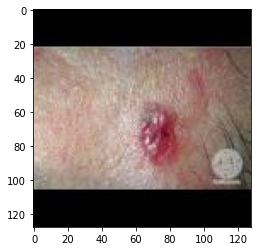

In [ ]:
num = 0
plt.imshow(imagens[num])

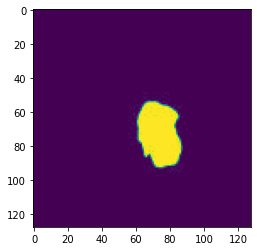

In [ ]:
plt.imshow(mascaras_medico[num])

In [ ]:
plt.imshow(predicoes[num,:,:,0])

In [ ]:
predicoes = net.predict(imagens[:41])

fim da predição


In [ ]:
# print("---- DESVIO PADRAO ------")
# print("sensitivity:",np.std(sensitivity_results_test))
# print("specificity:",np.std(specificity_results_test))
# print("accuracy:",np.std(accuracy_results_test))
# print("auc:",np.std(auc_results_test))
# print("dice:",np.std(dice_results_test))
# print("jaccard:",np.std(jaccard_results_test))

# Resultados

In [ ]:
############## PH2 RGB lr=1e-4 ##############
---- TREINO ------
sensitivity: 0.9168126899042093
specificity: 0.9760483013288844
accuracy: 0.9549781799316406
auc: 0.9464304956165469
dice: 0.934692612245551
jaccard: 0.8776190765645604
---- TESTE ------
sensitivity: 0.9106118890876835
specificity: 0.9728129800863146
accuracy: 0.9527752685546874
auc: 0.9417124345869992
dice: 0.9267077943040816
jaccard: 0.8636983292689253
Salvando resultados em CSV
CSVs salvos
TEMPO DE PROCESSAMENTO:  2418.466464996338

In [ ]:
# from numpy import genfromtxt

# print("############## CARREGAR CSVs ##############")
# #Treinamento
# sensitivity_results_train = genfromtxt('/content/drive/My Drive/Colab Notebooks/UNET2020/sensitivity_results_train.csv', delimiter=',')
# specificity_results_train = genfromtxt('/content/drive/My Drive/Colab Notebooks/UNET2020/specificity_results_train.csv', delimiter=',')
# accuracy_results_train = genfromtxt('/content/drive/My Drive/Colab Notebooks/UNET2020/accuracy_results_train.csv', delimiter=',')
# auc_results_train = genfromtxt('/content/drive/My Drive/Colab Notebooks/UNET2020/auc_results_train.csv', delimiter=',')
# dice_results_train = genfromtxt('/content/drive/My Drive/Colab Notebooks/UNET2020/dice_results_train.csv', delimiter=',')
# jaccard_results_train = genfromtxt('/content/drive/My Drive/Colab Notebooks/UNET2020/jaccard_results_train.csv', delimiter=',')

# print("---- TREINO ------")
# print("sensitivity:",np.mean(sensitivity_results_train))
# print("specificity:",np.mean(specificity_results_train))
# print("accuracy:",np.mean(accuracy_results_train))
# print("auc:",np.mean(auc_results_train))
# print("dice:",np.mean(dice_results_train))
# print("jaccard:",np.mean(jaccard_results_train))


# sensitivity_results_test = genfromtxt('/content/drive/My Drive/Colab Notebooks/UNET2020/sensitivity_results_test.csv', delimiter=',')
# specificity_results_test = genfromtxt('/content/drive/My Drive/Colab Notebooks/UNET2020/specificity_results_test.csv', delimiter=',')
# accuracy_results_test = genfromtxt('/content/drive/My Drive/Colab Notebooks/UNET2020/accuracy_results_test.csv', delimiter=',')
# auc_results_test = genfromtxt('/content/drive/My Drive/Colab Notebooks/UNET2020/auc_results_test.csv', delimiter=',')
# dice_results_test = genfromtxt('/content/drive/My Drive/Colab Notebooks/UNET2020/dice_results_test.csv', delimiter=',')
# jaccard_results_test = genfromtxt('/content/drive/My Drive/Colab Notebooks/UNET2020/jaccard_results_test.csv', delimiter=',')


# print("---- TESTE ------")
# print("sensitivity:",np.mean(sensitivity_results_test))
# print("specificity:",np.mean(specificity_results_test))
# print("accuracy:",np.mean(accuracy_results_test))
# print("auc:",np.mean(auc_results_test))
# print("dice:",np.mean(dice_results_test))
# print("jaccard:",np.mean(jaccard_results_test))


############## RESULTADO FINAL ##############
---- TREINO ------
sensitivity: 0.981222740094085
specificity: 0.9885232032113569
accuracy: 0.9867556762695313
auc: 0.9848729716527209
dice: 0.9729142465720312
jaccard: 0.9473464048506592
---- TESTE ------
sensitivity: 0.981222740094085
specificity: 0.9885232032113569
accuracy: 0.9867556762695313
auc: 0.9848729716527209
dice: 0.9729142465720312
jaccard: 0.9473464048506592


# Pegar o desvio padrão

In [ ]:
path_csvs = glob.glob("/content/drive/My Drive/Colab Notebooks/UNET2020/IEEE HEALTHCOM 2020/*")

In [ ]:
path_csvs

['/content/drive/My Drive/Colab Notebooks/UNET2020/IEEE HEALTHCOM 2020/ph2 - rgb - 128 - 1E-5',
 '/content/drive/My Drive/Colab Notebooks/UNET2020/IEEE HEALTHCOM 2020/ph2 - rgb - 128 - 1E-2',
 '/content/drive/My Drive/Colab Notebooks/UNET2020/IEEE HEALTHCOM 2020/ph2 - cinza - 128 - 1E-2',
 '/content/drive/My Drive/Colab Notebooks/UNET2020/IEEE HEALTHCOM 2020/ph2 - cinza - 128 - 1E-5',
 '/content/drive/My Drive/Colab Notebooks/UNET2020/IEEE HEALTHCOM 2020/dermis - cinza - 128 - 1E-5',
 '/content/drive/My Drive/Colab Notebooks/UNET2020/IEEE HEALTHCOM 2020/dermis - cinza - 128 - 1E-2',
 '/content/drive/My Drive/Colab Notebooks/UNET2020/IEEE HEALTHCOM 2020/dermis - rgb - 128 - 1E-2',
 '/content/drive/My Drive/Colab Notebooks/UNET2020/IEEE HEALTHCOM 2020/dermis - rgb - 128 - 1E-5',
 '/content/drive/My Drive/Colab Notebooks/UNET2020/IEEE HEALTHCOM 2020/ph2 - rgb - 256 - 1E-5',
 '/content/drive/My Drive/Colab Notebooks/UNET2020/IEEE HEALTHCOM 2020/ph2 - rgb - 256 - 1E-2',
 '/content/drive/My 

In [ ]:
# from numpy import genfromtxt
# for csv in path_csvs:
#   sensitivity_results_test = genfromtxt(csv+'/sensitivity_results_test.csv', delimiter=',')
#   specificity_results_test = genfromtxt(csv+'/specificity_results_test.csv', delimiter=',')
#   accuracy_results_test = genfromtxt(csv+'/accuracy_results_test.csv', delimiter=',')
#   auc_results_test = genfromtxt(csv+'/auc_results_test.csv', delimiter=',')
#   dice_results_test = genfromtxt(csv+'/dice_results_test.csv', delimiter=',')
#   jaccard_results_test = genfromtxt(csv+'/jaccard_results_test.csv', delimiter=',')

#   print("-----------------------------")
#   print(csv)
#   print("sensitivity:",np.std(sensitivity_results_test))
#   print("specificity:",np.std(specificity_results_test))
#   print("accuracy:",np.std(accuracy_results_test))
#   print("auc:",np.std(auc_results_test))
#   print("dice:",np.std(dice_results_test))
#   print("jaccard:",np.std(jaccard_results_test))

# PÓS PROCESSAMENTO

In [ ]:
inicio = time.time()

num_folds = 5

sensitivity_results_test = []
specificity_results_test = []
accuracy_results_test = []
auc_results_test = []
dice_results_test = []
jaccard_results_test = []

sensitivity_results_train = []
specificity_results_train = []
accuracy_results_train = []
auc_results_train = []
dice_results_train = []
jaccard_results_train = []

RESULTADOS = []


# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=1)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(imagens, mascaras_medico):
    print("######### KFOLD ",fold_no,"#########")
    
    net = Unet(imagens.shape[1],imagens.shape[2],img_channels=3,N_CLASSES=2,batchsize=40)

    #dividir o teste, tem validação e teste
    x_test, x_val, y_test, y_val = train_test_split(imagens[test], mascaras_medico[test], test_size = 0.5, random_state = 1)

    y_train= (np.asarray(mascaras_medico[train])> threshold_otsu(np.asarray(mascaras_medico[train])))
    y_val= (np.asarray(y_val)>threshold_otsu(np.asarray(y_val)))
    y_test= (np.asarray(y_test)>threshold_otsu(np.asarray(y_test)))

    arguments = {}
    arguments['epochs']=150
    # x_train, x_val, y_train, y_val
    arguments['X_train']=imagens[train]
    arguments['y_train']=y_train
    arguments['X_val']=x_val
    arguments['y_val']=y_val
    arguments['fold_no']=fold_no

    # net.load_weights()
    # net.train(**arguments)
    
    net.load_weights()
    pred = net.test(x_test,y_test)
    
    # calcular metricas do teste
    sensitivity,specificity,accuracy,auc,dice,jaccard = calc_metric(y_test,pred)
    
    sensitivity_results_test.append(sensitivity)
    specificity_results_test.append(specificity)
    accuracy_results_test.append(accuracy)
    auc_results_test.append(auc)
    dice_results_test.append(dice)
    jaccard_results_test.append(jaccard)
    
    print("---- TESTE - FOLD ",fold_no)
    print("sensitivity:",sensitivity)
    print("specificity:",specificity)
    print("accuracy:",accuracy)
    print("auc:",auc)
    print("dice:",dice)
    print("jaccard:",jaccard)
    
    # METRICAS DO TREINO
    #     net.load_weights()
    pred = net.test(imagens[train],y_train)
    
    # calcular metricas do treino
    sensitivity,specificity,accuracy,auc,dice,jaccard = calc_metric(y_train,pred)
    
    sensitivity_results_train.append(sensitivity)
    specificity_results_train.append(specificity)
    accuracy_results_train.append(accuracy)
    auc_results_train.append(auc)
    dice_results_train.append(dice)
    jaccard_results_train.append(jaccard)
    
    print("---- TREINO - FOLD ",fold_no)
    print("sensitivity:",sensitivity)
    print("specificity:",specificity)
    print("accuracy:",accuracy)
    print("auc:",auc)
    print("dice:",dice)
    print("jaccard:",jaccard)
    

    # Increase fold number
    fold_no = fold_no + 1
    
    keras.backend.clear_session()

print("############## RESULTADO FINAL ##############")
print("---- TREINO ------")
print("sensitivity:",np.mean(sensitivity_results_train))
print("specificity:",np.mean(specificity_results_train))
print("accuracy:",np.mean(accuracy_results_train))
print("auc:",np.mean(auc_results_train))
print("dice:",np.mean(dice_results_train))
print("jaccard:",np.mean(jaccard_results_train))

print("---- TESTE ------")
print("sensitivity:",np.mean(sensitivity_results_test))
print("specificity:",np.mean(specificity_results_test))
print("accuracy:",np.mean(accuracy_results_test))
print("auc:",np.mean(auc_results_test))
print("dice:",np.mean(dice_results_test))
print("jaccard:",np.mean(jaccard_results_test))


print("Salvando resultados em CSV")
np.savetxt("/content/drive/My Drive/Colab Notebooks/UNET2020/sensitivity_results_train.csv", sensitivity_results_train, delimiter=",")
np.savetxt("/content/drive/My Drive/Colab Notebooks/UNET2020/specificity_results_train.csv", specificity_results_train, delimiter=",")
np.savetxt("/content/drive/My Drive/Colab Notebooks/UNET2020/accuracy_results_train.csv", accuracy_results_train, delimiter=",")
np.savetxt("/content/drive/My Drive/Colab Notebooks/UNET2020/auc_results_train.csv", auc_results_train, delimiter=",")
np.savetxt("/content/drive/My Drive/Colab Notebooks/UNET2020/dice_results_train.csv", dice_results_train, delimiter=",")
np.savetxt("/content/drive/My Drive/Colab Notebooks/UNET2020/jaccard_results_train.csv", jaccard_results_train, delimiter=",")

np.savetxt("/content/drive/My Drive/Colab Notebooks/UNET2020/sensitivity_results_test.csv", sensitivity_results_test, delimiter=",")
np.savetxt("/content/drive/My Drive/Colab Notebooks/UNET2020/specificity_results_test.csv", specificity_results_test, delimiter=",")
np.savetxt("/content/drive/My Drive/Colab Notebooks/UNET2020/accuracy_results_test.csv", accuracy_results_test, delimiter=",")
np.savetxt("/content/drive/My Drive/Colab Notebooks/UNET2020/auc_results_test.csv", auc_results_test, delimiter=",")
np.savetxt("/content/drive/My Drive/Colab Notebooks/UNET2020/dice_results_test.csv", dice_results_test, delimiter=",")
np.savetxt("/content/drive/My Drive/Colab Notebooks/UNET2020/jaccard_results_test.csv", jaccard_results_test, delimiter=",")
print("CSVs salvos")

fim = time.time()
tempo_processamento = fim-inicio
print("TEMPO DE PROCESSAMENTO: ",tempo_processamento)


treino_results = pd.Series([np.mean(sensitivity_results_train), np.mean(specificity_results_train), np.mean(accuracy_results_train), np.mean(auc_results_train), np.mean(dice_results_train), np.mean(jaccard_results_train),tempo_processamento])
teste_results = pd.Series([np.mean(sensitivity_results_test), np.mean(specificity_results_test), np.mean(accuracy_results_test), np.mean(auc_results_test), np.mean(dice_results_test), np.mean(jaccard_results_test),tempo_processamento])

resultados = pd.DataFrame([list(treino_results), list(teste_results)],  columns =  ["Sensitivity", "specificity", "accuracy", "auc", "dice", "jaccard","tempo"])

np.savetxt("/content/drive/My Drive/Colab Notebooks/UNET2020/RESULTADOS.csv",resultados,fmt='%.16f', delimiter=",")